# Plots used in the thesis

In this notebooks, the plots for representing a bad leader example and the time complexity are coded and shown.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import leader_implementation

### Bad leader example

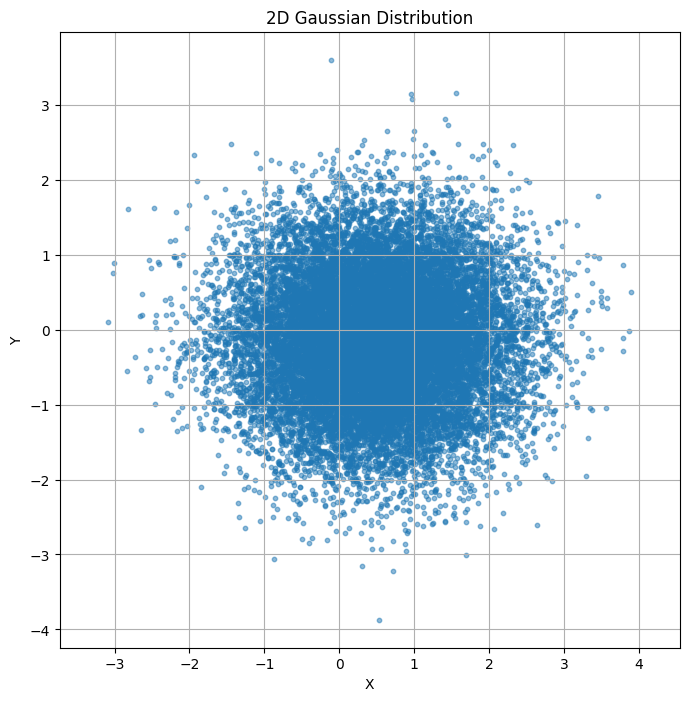

In [2]:
def create_gaussian_dataset(samples=2000, dimensions=5, clusters=3):
    np.random.seed(42)  # For reproducibility

    # Parameters for the Gaussian distributions
    num_dimensions = dimensions
    num_samples = samples
    num_clusters = clusters
    samples_per_cluster = num_samples // num_clusters

    # Means for the Gaussian distributions (centered around 0, 0)
    means = [np.random.randn(num_dimensions) for _ in range(num_clusters)]

    # Covariance matrices for the Gaussian distributions (randomly chosen, positive definite)
    covariances = [np.diag(np.random.rand(num_dimensions) + 0.1) for _ in range(num_clusters)]

    # Generate samples for each cluster
    X = []
    y = []
    for cluster_id in range(num_clusters):
        cluster_data = np.random.multivariate_normal(means[cluster_id], covariances[cluster_id], samples_per_cluster)
        X.append(cluster_data)
        y.append(np.full(samples_per_cluster, cluster_id))

    # Concatenate the data and labels
    X = np.vstack(X)
    y = np.concatenate(y)
    
    column_names = [f'Feature_{i}' for i in range(X.shape[1])]  # Create column names for features
    X = pd.DataFrame(X, columns=column_names)

    return X, y

X, y = create_gaussian_dataset(20000, 2, 1)
varinfo_dict = {i: {'name': X.columns[i], 'type': 'Continuous'} for i in range(len(X.columns))}  
varinfo = pd.DataFrame(varinfo_dict).transpose()


# Plotting the points
plt.figure(figsize=(8, 8))
plt.scatter(X['Feature_0'], X['Feature_1'], s=10, alpha=0.5)
plt.title('2D Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axis('equal')
plt.show()

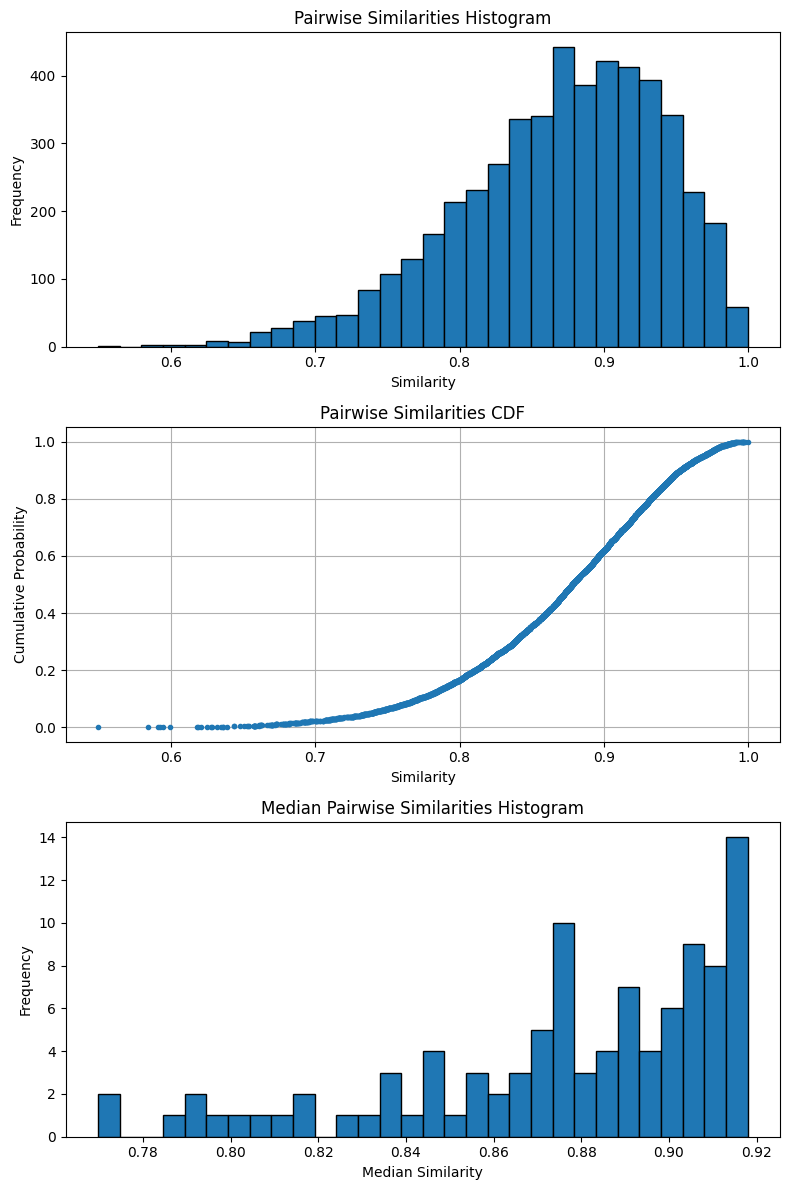

Mean similarity: 0.87
Quartiles: [0.82  0.88  0.92]
                Leader2                 

=========SUMMARY OF STATISTICS==========

Algorithm executed in 6.20 seconds

2 clusters have been found:

 Cluster 1     Leader: 0
               Size: 19302
               Average similarity: 0.9047
----------------------------------------
 Cluster 2     Leader: 1856
               Size: 698
               Average similarity: 0.8434
----------------------------------------


In [3]:
leader = leader_implementation.LeaderAlgorithms(X, varinfo)
k, leaders, cluster = leader.Leader2(s_min=0.64)

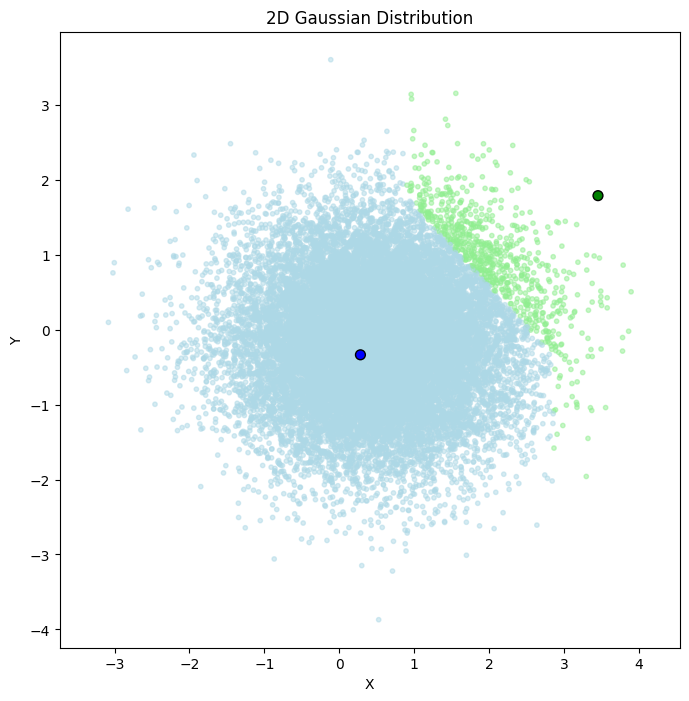

In [4]:
# Colors
colors = np.where(cluster == 0, 'lightblue', 'lightgreen')
highlight_colors = np.where(cluster == 0, 'blue', 'green')

# Plot the points
plt.figure(figsize=(8, 8))

# Plot all points with light colors
plt.scatter(X['Feature_0'], X['Feature_1'], c=colors, s=10, alpha=0.5)

# Highlight leaders with stronger colors
plt.scatter(X.iloc[leaders]['Feature_0'], X.iloc[leaders]['Feature_1'], 
            c=highlight_colors[leaders], s=50, edgecolor='black', linewidth=1, alpha=1)

plt.title('2D Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Y')
# plt.grid(True)
plt.axis('equal')
plt.show()

             Leader Medoid              

=========SUMMARY OF STATISTICS==========

Algorithm executed in 39.02 seconds

1 clusters have been found:

 Cluster 1     Leader: 6276
               Size: 20000
               Average similarity: 0.9032
----------------------------------------


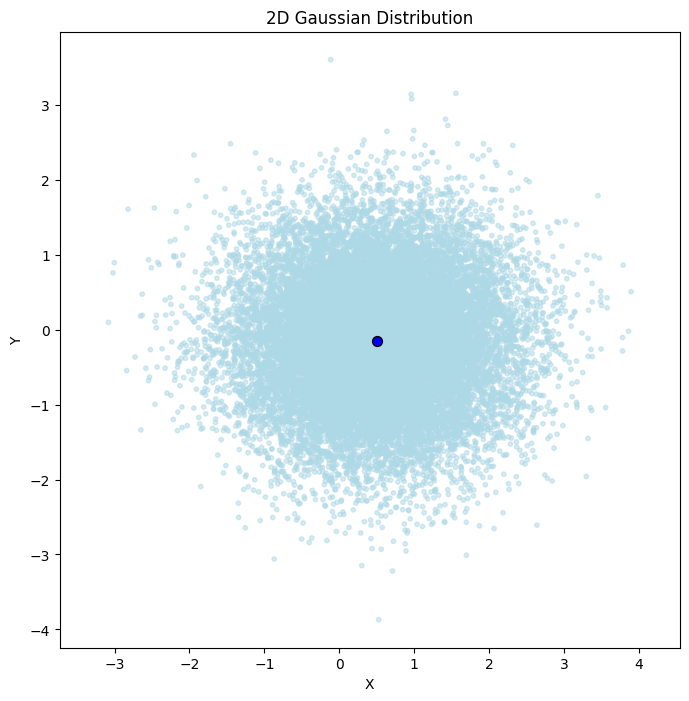

In [5]:
k, leaders, cluster = leader.Leader_Medoid(s_min=0.64)

# Colors
colors = np.where(cluster == 0, 'lightblue', 'lightgreen')
highlight_colors = np.where(cluster == 0, 'blue', 'green')

# Plot the points
plt.figure(figsize=(8, 8))

# Plot all points with light colors
plt.scatter(X['Feature_0'], X['Feature_1'], c=colors, s=10, alpha=0.5)

# Highlight leaders with stronger colors
plt.scatter(X.iloc[leaders]['Feature_0'], X.iloc[leaders]['Feature_1'], 
            c=highlight_colors[leaders], s=50, edgecolor='black', linewidth=1, alpha=1)

plt.title('2D Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Y')
# plt.grid(True)
plt.axis('equal')
plt.show()

# Time compllexity

In [6]:
df_time_N = pd.read_csv('time_N.csv')

df_time_N.head()

,Unnamed: 0,algorithm,N,M,time,K
0,0,Leader,1000,25,0.000000,5
1,1,Leader2,1000,25,0.000000,5
2,2,Ldr_Medoid,1000,25,0.023994,5
3,3,Ldr2_Medoid,1000,25,0.024024,5
4,4,Ldr3_Medoid,1000,25,0.056054,5


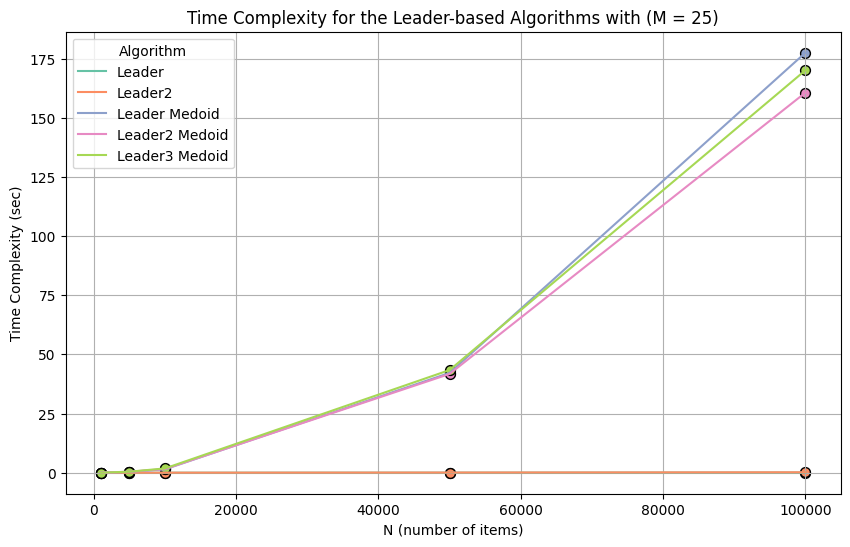

In [7]:
# Rename the algorithms
df_time_N['algorithm'] = df_time_N['algorithm'].replace({
    'Ldr_Medoid': 'Leader Medoid',
    'Ldr2_Medoid': 'Leader2 Medoid',
    'Ldr3_Medoid': 'Leader3 Medoid'
})

# Calculating the median time for each algorithm and N
df_median = df_time_N.groupby(['algorithm', 'N'])['time'].median().reset_index()

# Using Seaborn color palette for better distinguishability
colors = sns.color_palette("Set2", 5)

# Specified order for the legend
legend_order = ['Leader', 'Leader2', 'Leader Medoid', 'Leader2 Medoid', 'Leader3 Medoid']

# Plotting the line plot
plt.figure(figsize=(10, 6))

# Plotting each algorithm's median time complexities with lines
for i, algorithm in enumerate(legend_order):
    df_algorithm = df_median[df_median['algorithm'] == algorithm]
    plt.plot(df_algorithm['N'], df_algorithm['time'], label=algorithm, color=colors[i])

# Adding points to highlight data
for i, algorithm in enumerate(legend_order):
    df_algorithm = df_median[df_median['algorithm'] == algorithm]
    plt.scatter(df_algorithm['N'], df_algorithm['time'], color=colors[i], edgecolor='black', s=50)

plt.xlabel('N (number of items)')
plt.ylabel('Time Complexity (sec)')
plt.title('Time Complexity for the Leader-based Algorithms with (M = 25)')
plt.legend(title='Algorithm', loc='best')
plt.grid(True)
plt.show()

In [8]:
df_time_M = pd.read_csv('time_M.csv')

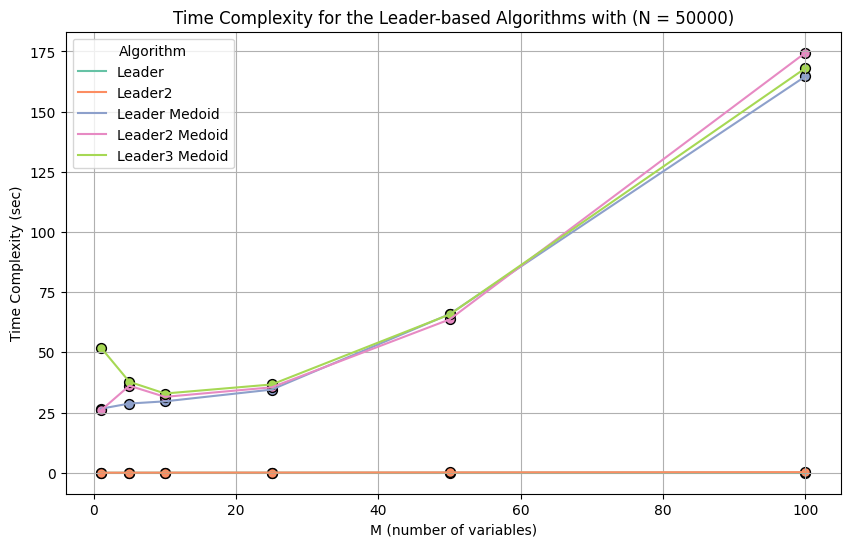

In [9]:
# Rename the algorithms
df_time_M['algorithm'] = df_time_M['algorithm'].replace({
    'Ldr_Medoid': 'Leader Medoid',
    'Ldr2_Medoid': 'Leader2 Medoid',
    'Ldr3_Medoid': 'Leader3 Medoid'
})

# Calculating the median time for each algorithm and M
df_median_M = df_time_M.groupby(['algorithm', 'M'])['time'].median().reset_index()

# Using Seaborn color palette for better distinguishability
colors = sns.color_palette("Set2", 5)

# Specified order for the legend
legend_order = ['Leader', 'Leader2', 'Leader Medoid', 'Leader2 Medoid', 'Leader3 Medoid']

# Plotting the line plot
plt.figure(figsize=(10, 6))

# Plotting each algorithm's median time complexities with lines
for i, algorithm in enumerate(legend_order):
    df_algorithm = df_median_M[df_median_M['algorithm'] == algorithm]
    plt.plot(df_algorithm['M'], df_algorithm['time'], label=algorithm, color=colors[i])

# Adding points to highlight data
for i, algorithm in enumerate(legend_order):
    df_algorithm = df_median_M[df_median_M['algorithm'] == algorithm]
    plt.scatter(df_algorithm['M'], df_algorithm['time'], color=colors[i], edgecolor='black', s=50)

plt.xlabel('M (number of variables)')
plt.ylabel('Time Complexity (sec)')
plt.title('Time Complexity for the Leader-based Algorithms with (N = 50000)')
plt.legend(title='Algorithm', loc='best')
plt.grid(True)
plt.show()